In [ ]:
- подготовка данных(добавление их в один .csv файл)
- удаление выбросов из данных(производная)
- построение 3д и 2д графиков кинетики
- сглаживание спектров(или изиспин или обынчый фильтр)
- взятие интеграла и второго интеграла у всех данных


In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
import tkinter as tk
from scipy.signal import lfilter
from scipy.signal import savgol_filter

In [24]:
for i in os.listdir('data_epr'): #тут меняю запятые на точки
    with open('data_epr/'+ i, 'r') as file:
        e = file.read()
        e = e.replace(',', '.')
    with open('data_epr/'+ i, 'w') as file:
        file.write(e)
    

FileNotFoundError: [Errno 2] No such file or directory: 'data_epr'

In [25]:
with open('generation_40min.csv', 'r') as file:
        e = file.read()
        e = e.replace(',', '.')
with open('generation_40min.csv', 'w') as file:
        file.write(e)

In [26]:
def process(i,k): # вычитаю дельту между стандартом (у меня это оксид магния-марганца) и тем, что померил спектрометр, значение я руками из espinozы взял
    
    c = 2.3 # Mn calibration, mT
    
    df = pd.read_csv(i, delimiter= ',')
    cols = df.columns
    df = df.sort_values(by = cols[0])
    plt.figure(figsize=(10,5))
    plt.plot(np.array(df[cols[0]]-c), np.array(df[cols[1]]), 'black', label = 'experimental')
    plt.xlim(334-c, 344-c)
    plt.ylim(-350, 350)
    plt.title(k)
    plt.xlabel('field, mT', fontsize = 14)
    plt.ylabel('signal', fontsize = 14)
    plt.legend()
    plt.savefig(i+'.png', dpi = 300)
def processav(i):
    df = pd.read_csv(i, delimiter= ';')
    cols = df.columns
    df[cols[1]] = df[cols[1]]/5
    df = df.sort_values(by = cols[0])
    plt.figure(figsize=(10,5))
    plt.plot(np.array(df[cols[0]]), np.array(df[cols[1]]))
    #plt.xlim(334, 344)
    #plt.ylim(-220, 220)
def processfilt(i, n = 15): # здесь я пытаюсь сгладить зашумленные спектры просто для того чтобы картинка лучше была. Обрабатываю я сырые данные
    df = pd.read_csv(i, delimiter= ';')
    cols = df.columns
    df = df.sort_values(by = cols[0])
    plt.figure(figsize=(10,5))
    n = 15  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    yy = lfilter(b,a,df[cols[1]])
    plt.plot(np.array(df[cols[0]]), yy, '-')
    #plt.xlim(320, 344)
    #plt.ylim(-2000, 2000)
    plt.title(i)
    plt.xlabel('field, mT', fontsize = 14)
def processfiltsav(i):
    df = pd.read_csv(i, delimiter= ';')
    cols = df.columns
    df = df.sort_values(by = cols[0])
    plt.figure(figsize=(10,5))
    yy = savgol_filter(df[cols[1]], 101, 2 )
    plt.plot(np.array(df[cols[0]]), yy, '-')
    #plt.xlim(334, 344)
    #plt.ylim(-200, 200)
    plt.title(i)
    plt.xlabel('field, mT', fontsize = 14)
def processfit(i):
    df = pd.read_csv(i, delimiter = '  ', header = None)
    cols = df.columns
    plt.figure(figsize=(10,5))
    plt.plot(np.array(df[cols[0]]), np.array(df[cols[2]]), 'g')
    plt.plot(np.array(df[cols[0]]), np.array(df[cols[1]]), 'r')
    plt.xlim(334, 344)
    #plt.ylim(-250, 250)
    plt.title(i)
    plt.xlabel('field, mT', fontsize = 14)
def processfitcalibrated(i, j, k): # это функция для двух массивов данных : из эспинозы и из изиспина после фиттинга
    
    c = 2.3 # Mn calibration, mT
    
    df = pd.read_csv(i, delimiter = '  ', header = None)
    df1 = pd.read_csv(j, delim_whitespace=True)
    cols = df.columns
    cols1 = df1.columns
    scalfac = max(abs(np.array(df1[cols1[1]])))
    plt.figure(figsize=(10,5))
    plt.plot(np.array(df[cols[0]]-c), np.array(df[cols[2]])*scalfac, 'black', label = 'experimental')
    plt.plot(np.array(df[cols[0]]-c), np.array(df[cols[1]])*scalfac, 'r', label = 'simulated')
    plt.xlim(334-c, 344-c)
    plt.ylim(-350, 350)
    plt.title(k)
    plt.xlabel('field, mT', fontsize = 14)
    plt.ylabel('signal', fontsize = 14)
    plt.legend()
    plt.savefig(i+'.png', dpi = 300)

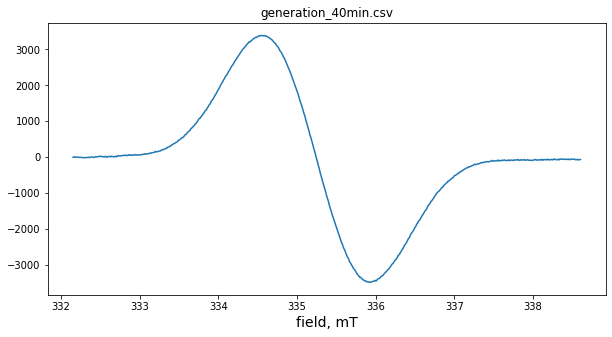

In [27]:
processfilt('generation_40min.csv')

In [28]:
df = pd.read_csv('generation_40min.csv', delimiter= ';')
cols = df.columns
df = df.sort_values(by = cols[0])
 

In [29]:
df['Y (Average)'].max()

3573.225586

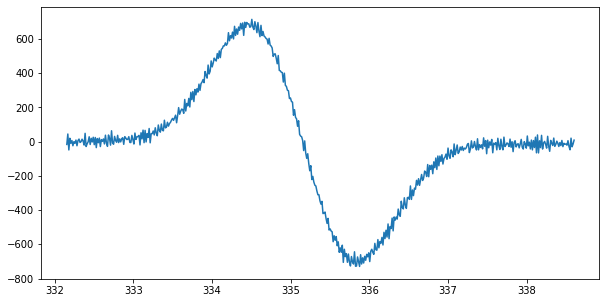

In [30]:
processav('generation_40min.csv')


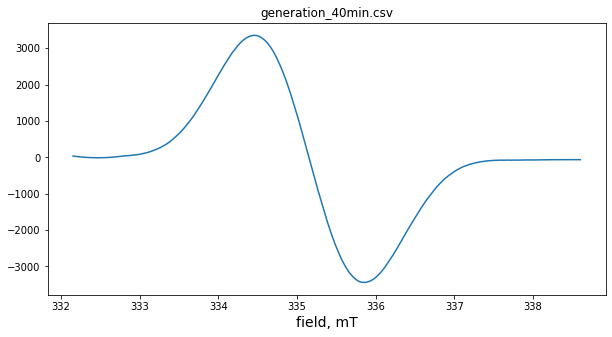

In [31]:
processfiltsav('generation_40min.csv')

In [188]:
from scipy import integrate
x = df['X (500 points)']
y = df['Y (Average)']
q = []
for i in range(1,len(x)):
    q.append(integrate.simps(y[:i], x[:i], dx=x[:i], even='first'))
y_int = integrate.cumtrapz(y, x, initial=0)

In [189]:
len(q)

499

In [190]:
df['Y (Average)']

0      -81.579056
1      222.442246
2     -242.746612
3       98.495430
4      -48.610573
          ...    
495   -238.532074
496    101.497421
497   -151.487900
498    -68.854584
499     43.219669
Name: Y (Average), Length: 500, dtype: float64

In [191]:
df['X (500 points)']

0      332.152771
1      332.165680
2      332.178619
3      332.191528
4      332.204468
          ...    
495    338.551422
496    338.564362
497    338.577301
498    338.590210
499    338.603149
Name: X (500 points), Length: 500, dtype: float64

In [192]:
q_1 = []
for i in range(1,len(x)):
    q_1.append(integrate.simps(q[:i], x[:i], dx=x[:i], even='first'))

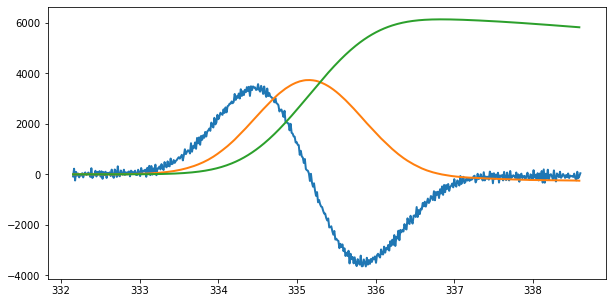

In [193]:
plt.figure(figsize=(10,5))
plt.plot(x,y, linewidth=2)
plt.plot(x[:499],q,linewidth=2)
plt.plot(x[:499],q_1,linewidth=2)

In [49]:
import pandas as pd

In [53]:
data = pd.read_csv('FieldDelay_6-17min_cleaned.csv', sep=';')

In [80]:
data = data.apply(lambda x: x.str.replace(',','.'))
data = data.apply(lambda x: x.astype(float))

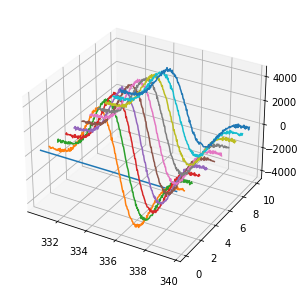

In [135]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(5,5))
verts = []
ax = fig.add_subplot(projection='3d')
for i,column in enumerate(data.columns):
    ax.plot(x,  [i]*250,data[column],)


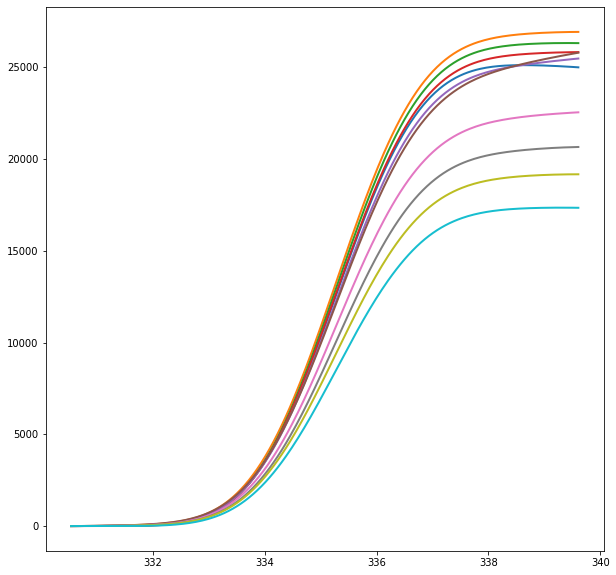

In [242]:

from matplotlib.collections import PolyCollection
from scipy import integrate

x = data['X (250 points)']
y = df['Y (Average)']
#q = []
#q_1 = []
a = []

fig = plt.figure(figsize=(10,10))
verts = []
for i,column in enumerate(data.columns[1:]):
    q = []
    for j in range(1,len(data['X (250 points)'])):
        q.append(integrate.simps(data[column][:j], data['X (250 points)'][:j], dx=data['X (250 points)'][:j], even='first'))
    q_1 = []
    for k in range(1,len(data['X (250 points)'])):   
        q_1.append(integrate.simps(q[:k], data['X (250 points)'][:k], dx=data['X (250 points)'][:k], even='first'))
    a.append(max(q_1))
    plt.plot(x[:249],q_1,linewidth=2)
    


In [174]:
data.columns[1]

'Y1'

[25114.972895597395,
 26925.721151050115,
 26319.22987083003,
 25825.587839673968,
 25474.736752976965,
 25792.11757661762,
 22544.5457153039,
 20655.344680807044,
 19167.265292039112,
 17349.414360061906]

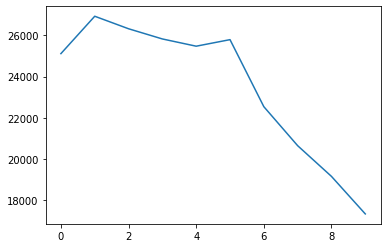

In [245]:
plt.plot(range(10), a)

a


In [236]:
len(q_1)

249

In [227]:
len(a[0])

2490

In [231]:
alo = []
for j in range(1,len(data['X (250 points)'])):
    alo.append(integrate.simps(data['Y1'][:j], data['X (250 points)'][:j], dx=data['X (250 points)'][:j], even='first'))

In [232]:
len(alo)

249

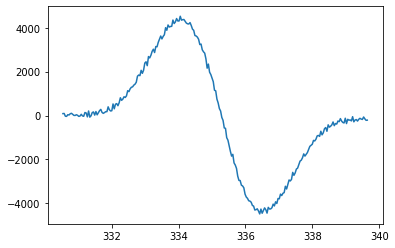

In [253]:
plt.plot(data['X (250 points)'], data['Y1'])

In [263]:
from scipy.fft import fft, fftfreq
y = data['Y1'].to_numpy()
yf = fft(y)

In [261]:
data['Y1']

0       88.724380
1       95.331131
2      -30.827791
3      -37.994308
4       38.715645
          ...    
245   -176.713409
246    -65.293518
247   -147.862686
248   -217.224045
249   -209.502274
Name: Y1, Length: 250, dtype: float64

In [387]:
df_2 = pd.read_csv('8 min peak.csv', delimiter= ';')
cols_2 = df_2.columns
df_2 = df_2.sort_values(by = cols_2[0])

df_2 = df_2.apply(lambda x: x.str.replace(',','.'))
df_2 = df_2.apply(lambda x: x.astype(float))

In [388]:
df_2

,X (500 points),Y (Average),Y (Scan 1)
0,332.87796,-54.844490,-54.844490
1,332.88797,-48.160980,-48.160980
2,332.89798,98.131050,98.131050
3,332.90802,2.690871,2.690871
4,332.91803,-209.622849,-209.622849
...,...,...,...
495,337.83786,-15.155713,-15.155713
496,337.84790,-119.913628,-119.913628
497,337.85791,-131.621750,-131.621750
498,337.86792,-112.160515,-112.160515


In [389]:
x_2 = df_2['X (500 points)']
y_2 = df_2['Y (Average)']

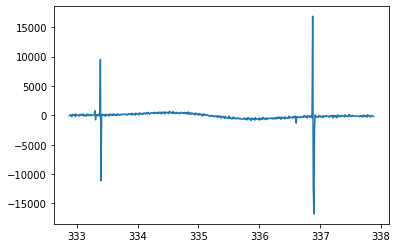

In [390]:
plt.plot(x_2,y_2)

In [406]:
y_2[:]

0      -54.844490
1      -48.160980
2       98.131050
3        2.690871
4     -209.622849
          ...    
495    -15.155713
496   -119.913628
497   -131.621750
498   -112.160515
499   -183.570206
Name: Y (Average), Length: 500, dtype: float64

In [401]:
from scipy.misc import derivative

t = diff(y_2)
t

0             NaN
1        6.683510
2      146.292030
3      -95.440180
4     -212.313719
          ...    
495    280.107745
496   -104.757915
497    -11.708122
498     19.461235
499    -71.409691
Name: Y (Average), Length: 500, dtype: float64

In [414]:
y_2[y_2<200]

0      -54.844490
1      -48.160980
2       98.131050
3        2.690871
4     -209.622849
          ...    
495    -15.155713
496   -119.913628
497   -131.621750
498   -112.160515
499   -183.570206
Name: Y (Average), Length: 380, dtype: float64

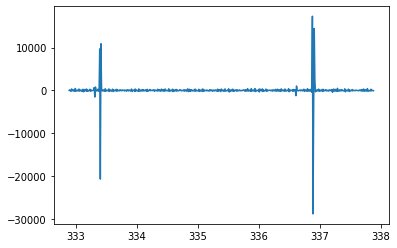

In [362]:

plt.plot(x_2,y_2)

In [293]:
y_2[223] - y_2[222]

-81.75584414

In [302]:
y_2[450] - y_2[449]

-118.80408861000001

In [301]:
y_2[420] - y_2[419]

-43.1829376

In [314]:
from sympy import diff

In [455]:
y_2[2]

98.13105011

In [492]:
abs(diff(y_2))

0             NaN
1        6.683510
2      146.292030
3       95.440180
4      212.313719
          ...    
495    280.107745
496    104.757915
497     11.708122
498     19.461235
499     71.409691
Name: Y (Average), Length: 500, dtype: float64

In [493]:
e = []
#[e.append(y_2[i]) for i in range(20) if abs(diff(y_2[i])) < 200];
[e.append(y_2[i]) if abs(diff(y_2)[i]) < 200 else spec.append(np.mean(y_2[i-5:i-3])) for i in range(20)];

In [494]:
e

[-48.16098022,
 98.13105011,
 2.690870523,
 58.24571991,
 14.66639328,
 154.440033,
 -30.4458828,
 -211.3582306,
 -36.25255585,
 56.55301285,
 -28.64481163,
 -140.5691223,
 17.06749535,
 120.8935623]

In [574]:
stats.mode(y_2[20-15:20-5])[0]

array([-211.3582306])

In [550]:
from scipy import stats

In [718]:
spec = []
[spec.append(y_2[i]) if abs(diff(y_2)[i]) < 350 else spec.append(np.mean(y_2[i-11:i-5])) for i in range(len(y_2))];

In [719]:
spec;

In [720]:
len(spec)

500

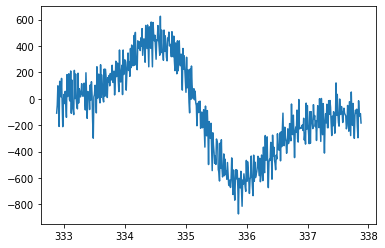

In [721]:
plt.plot(x_2,spec)

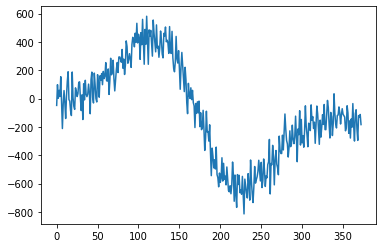

In [430]:
y_3 = abs(diff(y_2))
plt.plot(range(len(y_2[y_3<200])),y_2[(y_3<200)])


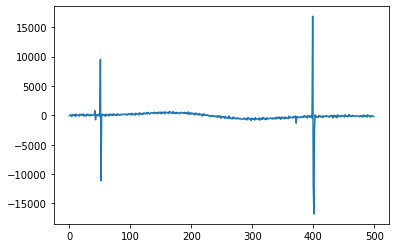

In [427]:
plt.plot(range(len(x_2)),y_2)

In [355]:
y_2[y_2>100]

2      139.608520
5      554.286345
8      183.352966
11     630.362360
13     136.101555
          ...    
485    136.868092
486    224.357201
489    534.526619
491    192.109024
495    361.596820
Name: Y (Average), Length: 198, dtype: float64

In [431]:
from statsmodels.nonparametric.smoothers_lowess import lowess

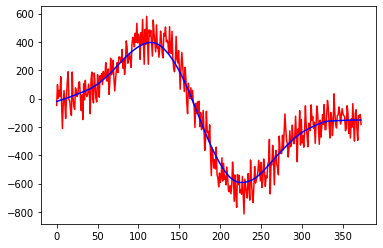

In [448]:
filtered = lowess(y_2[(y_3<200)], range(len(y_2[(y_3<200)])), is_sorted=True, frac=0.225, it=0)

plt.plot(range(len(y_2[(y_3<200)])), y_2[(y_3<200)], 'r')
plt.plot(filtered[:,0], filtered[:,1], 'b')

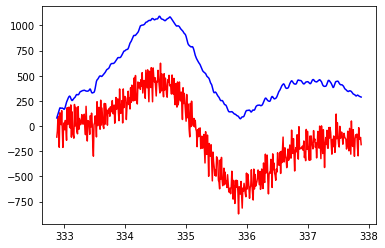

In [743]:
filtered = lowess(Modpoly_output, x_2, is_sorted=True, frac=0.025, it=0)

plt.plot(x_2, spec, 'r')
plt.plot(filtered[:,0], filtered[:,1], 'b')

In [ ]:
plt.plot(x_2, Modpoly_output, 'b')

In [745]:
q = []
for i in range(1,len(filtered[:,0])):
    q.append(integrate.simps(filtered[:,1][:i], filtered[:,0][:i], dx=filtered[:,0][:i], even='first'))

q_1 = []
for i in range(1,len(filtered[:,0])):
    q_1.append(integrate.simps(q[:i], filtered[:,0][:i], dx=filtered[:,0][:i], even='first'))

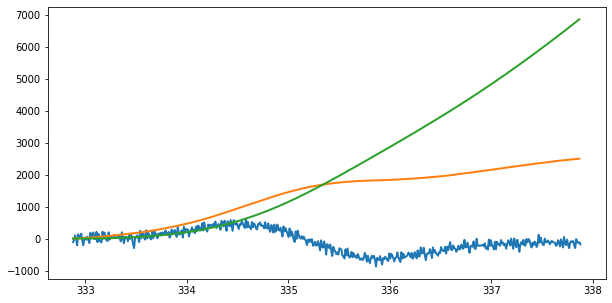

In [747]:
plt.figure(figsize=(10,5))
plt.plot(x_2,spec, linewidth=2)
plt.plot(filtered[:,0][:499],q,linewidth=2)
plt.plot(filtered[:,0][:499],q_1,linewidth=2)

In [681]:

from scipy import sparse
from scipy.sparse.linalg import spsolve

In [684]:
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

In [767]:
base = baseline_als(spec,2,1)

In [757]:
!pip install BaselineRemoval

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [741]:
from BaselineRemoval import BaselineRemoval

input_array=[10,20,1.5,5,2,9,99,25,47]
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(spec)

Modpoly_output=baseObj.ModPoly(polynomial_degree)
Imodpoly_output=baseObj.IModPoly(polynomial_degree)
Zhangfit_output=baseObj.ZhangFit()

#print('Original input:',input_array)
#print('Modpoly base corrected values:',Modpoly_output)
#print('IModPoly base corrected values:',Imodpoly_output)
#print('ZhangFit base corrected values:',Zhangfit_output)


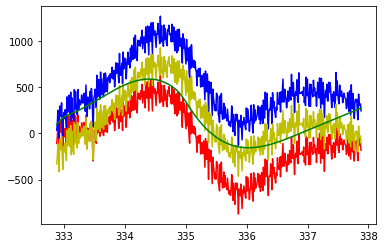

In [770]:
plt.plot(x_2,spec, 'r')
plt.plot(x_2, Modpoly_output, 'b')
plt.plot(x_2, Imodpoly_output, 'y')
plt.plot(x_2, base, 'g')


In [740]:
baseObj

In [698]:
type(spec[0])

numpy.float64

In [700]:
type(float(spec[0]))

float

In [703]:
spec.float()

AttributeError: 'list' object has no attribute 'float'